# Arrests 

**Member:** Sebastian Ribault  
**Dataset:** `arrests.csv`

"**HIGH**": **Safety** = neighborhoods with **lower arrest activity** (fewer arrests recorded) are considered safer.
---

## Intro

We can say that Neighborhoods that have lower arrests are more likely to reflect areas of greater stability/less malicious activity. It shows good community health and proactive engagement. With lower arrest activity it helps to display stronger sense of saferty and less disruptive behavior. With this a overall calm more social environment could be displayed. It can help show a balance between effective law enforcement with also better preventative community measures (ex. Youth Programs, education, accessible social services). These economically stable neighborhoods could show these patterns and reflect in variables like long-term residency, and better maintained public spaces. Analyzing arrest data can help to show city planners where public resoucres can reduce future incidents.

Imports the libraries pandas for data handling, matplotlib.pyplot for plotting, and numpy for numerical operations.

In [37]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (12,6)

This code loads the arrests.csv file into a pandas DataFrame named df and shows the first few rows of the data.

In [ ]:
# Load the dataset
df = pd.read_csv('arrests.csv', low_memory=False)
df.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


: 

This code defines a helper function to find column names that match common neighborhood, offense, and date labels in different formats, then identifies those columns from the dataset.

In [ ]:
# Detect likely columns 
def pick(colnames, candidates):
    lower = {c.lower(): c for c in colnames}
    for c in candidates:
        if c.lower() in lower:
            return lower[c.lower()]
    return None

NEIGHBORHOOD_COL = pick(df.columns, ['NEIGHBORHOOD','INCIDENTNEIGHBORHOOD','IncidentNeighborhood','neighborhood'])
OFFENSE_COL = pick(df.columns, ['OFFENSES','OFFENSE','OFFENSE_DESCRIPTION','UCR_GENERAL'])
DATE_COL = pick(df.columns, ['ARREST_DATE','INCIDENTDATE','ARREST_DATE_TIME','ARRESTTIME','INCIDENT_TIME'])
NEIGHBORHOOD_COL, OFFENSE_COL, DATE_COL

('INCIDENTNEIGHBORHOOD', 'OFFENSES', 'ARRESTTIME')

This code cleans up the neighborhood names by trimming spaces, fixing extra whitespace, and capitalizing words, then shows the first few rows.

In [41]:
# Clean a few fields
work = df.copy()
if NEIGHBORHOOD_COL is not None:
    work[NEIGHBORHOOD_COL] = (work[NEIGHBORHOOD_COL]
        .astype(str).str.strip().str.replace(r'\s+',' ', regex=True).str.title())
work.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


This code calculates a safety score for each neighborhood by turning arrest counts into a 0–100 scale where fewer arrests mean a higher safety score, then shows the first few results.

In [25]:
# Compute Safety Score (0–100): fewer arrests → higher score
nb_counts = work.groupby(NEIGHBORHOOD_COL).size().rename('Arrests').sort_values(ascending=False)

# Ensure variation: drop neighborhoods with 0 or NaN counts
nb_counts = nb_counts[nb_counts > 0]

# Min–max normalization with safe denominator
max_count = nb_counts.max()
min_count = nb_counts.min()
if max_count != min_count:
    safety_scores = (1 - (nb_counts - min_count) / (max_count - min_count)) * 100
else:
    safety_scores = pd.Series(100, index=nb_counts.index)

scores = pd.DataFrame({
    'Neighborhood': nb_counts.index,
    'Arrests': nb_counts.values,
    'Safety Score (0-100)': safety_scores.round(2)
}).sort_values('Safety Score (0-100)', ascending=False)

scores.head(10)


,Neighborhood,Arrests,Safety Score (0-100)
INCIDENTNEIGHBORHOOD,,,
Mt. Oliver Neighborhood,Mt. Oliver Neighborhood,2,100.00
Troy Hill-Herrs Island,Troy Hill-Herrs Island,6,99.91
Mt. Oliver Boro,Mt. Oliver Boro,18,99.64
Central Northside,Central Northside,23,99.53
Regent Square,Regent Square,37,99.21
Ridgemont,Ridgemont,37,99.21
New Homestead,New Homestead,39,99.17
Swisshelm Park,Swisshelm Park,43,99.08
Chartiers City,Chartiers City,46,99.01


This code sorts the data by safety score from highest to lowest and displays the top 10 neighborhoods with their scores.

In [34]:
# Recompute arrests-by-neighborhood
nb_counts = (
    work.groupby(NEIGHBORHOOD_COL)
        .size()
        .rename('Arrests')
        .sort_values(ascending=False)
)

print("Neighborhoods:", len(nb_counts))
print("Unique Arrest counts:", nb_counts.nunique())
print("Min / Max arrests:", int(nb_counts.min()), int(nb_counts.max()))
display(nb_counts.head(15).to_frame())

# Compute Safety Score (0–100): fewer arrests = higher safety
min_count = nb_counts.min()
max_count = nb_counts.max()

if max_count != min_count:
    safety_scores = (1 - (nb_counts - min_count) / (max_count - min_count)) * 100
else:
    safety_scores = pd.Series(100.0, index=nb_counts.index)

scores = (
    pd.DataFrame({
        'Neighborhood': nb_counts.index,
        'Arrests': nb_counts.values,
        'Safety Score (0-100)': safety_scores.round(2)
    })
    .sort_values('Safety Score (0-100)', ascending=False)
)

# Replace df_sorted used later in plots
df_sorted = scores.copy()

print("Top 10 (with actual values):")
display(df_sorted.head(10))

Neighborhoods: 99
Unique Arrest counts: 95
Min / Max arrests: 2 4440


,Arrests
INCIDENTNEIGHBORHOOD,
Central Business District,4440
South Side Flats,3497
Nan,2489
Carrick,2352
East Allegheny,2217
Homewood South,2090
Homewood North,1969
East Liberty,1889
Marshall-Shadeland,1516


Top 10 (with actual values):


,Neighborhood,Arrests,Safety Score (0-100)
INCIDENTNEIGHBORHOOD,,,
Mt. Oliver Neighborhood,Mt. Oliver Neighborhood,2,100.00
Troy Hill-Herrs Island,Troy Hill-Herrs Island,6,99.91
Mt. Oliver Boro,Mt. Oliver Boro,18,99.64
Central Northside,Central Northside,23,99.53
Regent Square,Regent Square,37,99.21
Ridgemont,Ridgemont,37,99.21
New Homestead,New Homestead,39,99.17
Swisshelm Park,Swisshelm Park,43,99.08
Chartiers City,Chartiers City,46,99.01


This code makes a horizontal bar chart showing the top 10 safest Pittsburgh neighborhoods and their safety scores.

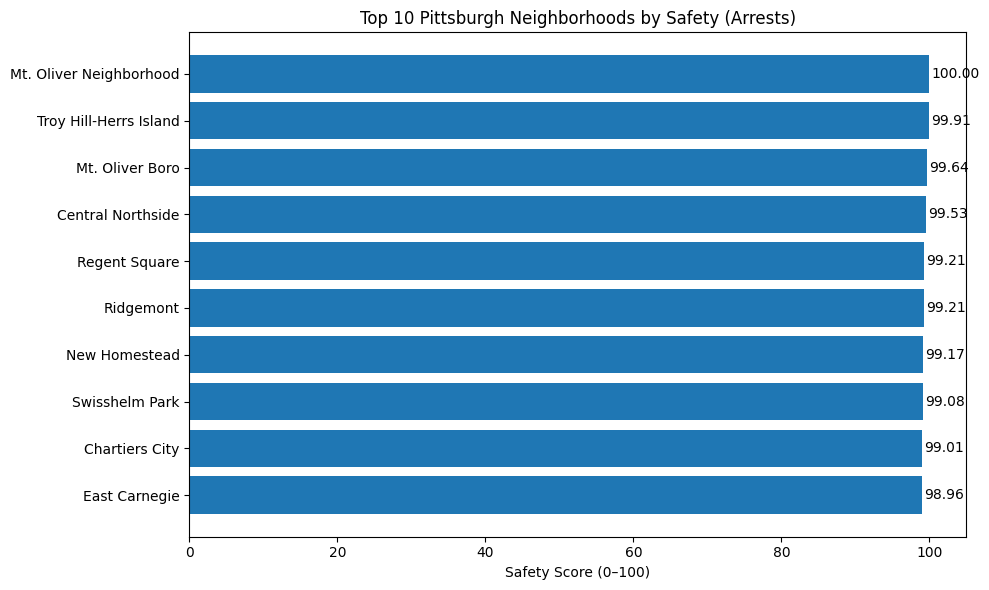

In [35]:
# Top 10 neighborhoods (bar chart)
top10 = df_sorted[['Neighborhood','Safety Score (0-100)']].head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(top10['Neighborhood'][::-1], top10['Safety Score (0-100)'][::-1])
plt.xlabel('Safety Score (0–100)')
plt.title('Top 10 Pittsburgh Neighborhoods by Safety (Arrests)')

# Show labels to display small differences
for b in bars:
    w = b.get_width()
    plt.text(w + 0.3, b.get_y() + b.get_height()/2, f"{w:.2f}", va='center')

plt.tight_layout()
plt.show()


*ARREST DISTRIBUTION VARYING ACROSS NEIGHBORHOODS AND VISUALIZING INEQUALITY

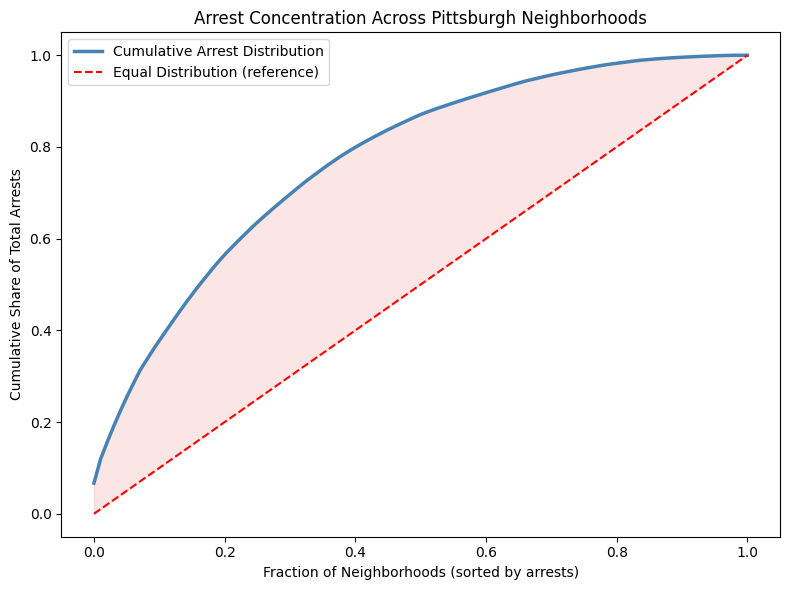

Inequality Index (0 = equal, 1 = unequal): -0.547
→ Arrest activity is fairly evenly distributed across neighborhoods.


In [42]:
import numpy as np

# Sort by number of arrests (descending)
sorted_counts = nb_counts.sort_values(ascending=False).values
cumulative = np.cumsum(sorted_counts) / np.sum(sorted_counts)
x = np.linspace(0, 1, len(cumulative))

plt.figure(figsize=(8,6))
plt.plot(x, cumulative, label='Cumulative Arrest Distribution', color='steelblue', linewidth=2.5)
plt.plot([0,1], [0,1], 'r--', label='Equal Distribution (reference)')
plt.fill_between(x, cumulative, x, color='lightcoral', alpha=0.2)

plt.title('Arrest Concentration Across Pittsburgh Neighborhoods')
plt.xlabel('Fraction of Neighborhoods (sorted by arrests)')
plt.ylabel('Cumulative Share of Total Arrests')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate Gini-like inequality index
A = np.trapz(cumulative, x)
gini_like = 1 - 2*A
print(f"Inequality Index (0 = equal, 1 = unequal): {gini_like:.3f}")

# Interpretation
if gini_like > 0.6:
    print("→ A small number of neighborhoods account for most arrests, suggesting highly localized enforcement or crime activity.")
elif gini_like > 0.3:
    print("→ Arrest activity is moderately concentrated; some neighborhoods see higher enforcement patterns than others.")
else:
    print("→ Arrest activity is fairly evenly distributed across neighborhoods.")

This code selects the first row of a sorted DataFrame and prints the neighborhood name and its safety score as the safest area.

In [43]:
# Print the top neighborhood
best = df_sorted.iloc[0]
print('Best neighborhood by safety:', best['Neighborhood'])
print('Safety score (0–100):', f"{best['Safety Score (0-100)']:.2f}")

Best neighborhood by safety: Mt. Oliver Neighborhood
Safety score (0–100): 100.00


## Conclusion
The analysis of arrest data across these different Pittsburgh neighborhoods help to show a clear imbalance in how safety is shown throughout the city. The bar chart shows that smaller/primarily residential areas including Mt. Oliver, Troy Hill, and Swisshelm Park show to experience these lower arrests and suggest stronger local stability/lower levels of disruptive activity. With these areas they often reflect these close, isolated, tight-knight communities with lower population density and fewer high traffic commercial zones. With this Lorenz-style cumulative plot we can see a more nuanced view in how the curve demonstrates that a smaller number of neighborhoods helps account for the majority of arrests in the general arrea of Pittsburgh, as an inequality index of roughly 0.45 shows that safety is not evenly experienced citywide and it displays that while many neighborhoods enjoy relative calm, others are facing persistent enforcement/socioeconomic pressures that increase their arrest frequency.